In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, GlobalAveragePooling1D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Montage du Google Drive
from google.colab import drive
drive.mount('/content/drive')
directory_path = "/content/drive/My Drive/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chargement des fichiers csv depuis le drive

vert_2301_names = []
for i in range(1, 30):
    vert_2301_names.append(f"V{i} 230 1")

# Afficher la liste complète
print(vert_2301_names)

vert_2302_names = []
for i in range(1, 30):
    vert_2302_names.append(f"V{i} 230 2")

# Afficher la liste complète
print(vert_2302_names)

vert_517_names = []
for i in range(1, 30):
    vert_517_names.append(f"V{i} 517")

# Afficher la liste complète
print(vert_517_names)



['V1 230 1', 'V2 230 1', 'V3 230 1', 'V4 230 1', 'V5 230 1', 'V6 230 1', 'V7 230 1', 'V8 230 1', 'V9 230 1', 'V10 230 1', 'V11 230 1', 'V12 230 1', 'V13 230 1', 'V14 230 1', 'V15 230 1', 'V16 230 1', 'V17 230 1', 'V18 230 1', 'V19 230 1', 'V20 230 1', 'V21 230 1', 'V22 230 1', 'V23 230 1', 'V24 230 1', 'V25 230 1', 'V26 230 1', 'V27 230 1', 'V28 230 1', 'V29 230 1']
['V1 230 2', 'V2 230 2', 'V3 230 2', 'V4 230 2', 'V5 230 2', 'V6 230 2', 'V7 230 2', 'V8 230 2', 'V9 230 2', 'V10 230 2', 'V11 230 2', 'V12 230 2', 'V13 230 2', 'V14 230 2', 'V15 230 2', 'V16 230 2', 'V17 230 2', 'V18 230 2', 'V19 230 2', 'V20 230 2', 'V21 230 2', 'V22 230 2', 'V23 230 2', 'V24 230 2', 'V25 230 2', 'V26 230 2', 'V27 230 2', 'V28 230 2', 'V29 230 2']
['V1 517', 'V2 517', 'V3 517', 'V4 517', 'V5 517', 'V6 517', 'V7 517', 'V8 517', 'V9 517', 'V10 517', 'V11 517', 'V12 517', 'V13 517', 'V14 517', 'V15 517', 'V16 517', 'V17 517', 'V18 517', 'V19 517', 'V20 517', 'V21 517', 'V22 517', 'V23 517', 'V24 517', 'V25 5

In [ ]:
# Chargement des fichiers csv depuis le drive

noir_2301_names = []
for i in range(1, 22):
    noir_2301_names.append(f"N{i} 230 1")

# Afficher la liste complète
print(noir_2301_names)

noir_2302_names = []
for i in range(1, 22):
    noir_2302_names.append(f"N{i} 230 2")

# Afficher la liste complète
print(noir_2302_names)

noir_517_names = []
for i in range(1, 22):
    noir_517_names.append(f"N{i} 517")

# Afficher la liste complète
print(noir_517_names)


['N1 230 1', 'N2 230 1', 'N3 230 1', 'N4 230 1', 'N5 230 1', 'N6 230 1', 'N7 230 1', 'N8 230 1', 'N9 230 1', 'N10 230 1', 'N11 230 1', 'N12 230 1', 'N13 230 1', 'N14 230 1', 'N15 230 1', 'N16 230 1', 'N17 230 1', 'N18 230 1', 'N19 230 1', 'N20 230 1', 'N21 230 1']
['N1 230 2', 'N2 230 2', 'N3 230 2', 'N4 230 2', 'N5 230 2', 'N6 230 2', 'N7 230 2', 'N8 230 2', 'N9 230 2', 'N10 230 2', 'N11 230 2', 'N12 230 2', 'N13 230 2', 'N14 230 2', 'N15 230 2', 'N16 230 2', 'N17 230 2', 'N18 230 2', 'N19 230 2', 'N20 230 2', 'N21 230 2']
['N1 517', 'N2 517', 'N3 517', 'N4 517', 'N5 517', 'N6 517', 'N7 517', 'N8 517', 'N9 517', 'N10 517', 'N11 517', 'N12 517', 'N13 517', 'N14 517', 'N15 517', 'N16 517', 'N17 517', 'N18 517', 'N19 517', 'N20 517', 'N21 517']


In [ ]:
# Chargement des fichiers csv depuis le drive

blanc_2301_names = []
for i in range(1, 11):
    blanc_2301_names.append(f"B{i} 230 1")

# Afficher la liste complète
print(blanc_2301_names)

blanc_2302_names = []
for i in range(1,11):
    blanc_2302_names.append(f"B{i} 230 2")

# Afficher la liste complète
print(blanc_2302_names)

blanc_517_names = []
for i in range(1,11):
    blanc_517_names.append(f"B{i} 517")

# Afficher la liste complète
print(blanc_517_names)


['B1 230 1', 'B2 230 1', 'B3 230 1', 'B4 230 1', 'B5 230 1', 'B6 230 1', 'B7 230 1', 'B8 230 1', 'B9 230 1', 'B10 230 1']
['B1 230 2', 'B2 230 2', 'B3 230 2', 'B4 230 2', 'B5 230 2', 'B6 230 2', 'B7 230 2', 'B8 230 2', 'B9 230 2', 'B10 230 2']
['B1 517', 'B2 517', 'B3 517', 'B4 517', 'B5 517', 'B6 517', 'B7 517', 'B8 517', 'B9 517', 'B10 517']


In [ ]:
# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
vert_2301 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in vert_2301_names:
    vert_2301[nom_fichier] = pd.read_csv("/content/drive/My Drive/vert/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
vert_2302 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in vert_2302_names:
    vert_2302[nom_fichier] = pd.read_csv("/content/drive/My Drive/vert/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
vert_517 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in vert_517_names:
    vert_517[nom_fichier] = pd.read_csv("/content/drive/My Drive/vert/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)


In [ ]:
# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
noir_2301 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in noir_2301_names:
    noir_2301[nom_fichier] = pd.read_csv("/content/drive/My Drive/noir/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
noir_2302 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in noir_2302_names:
    noir_2302[nom_fichier] = pd.read_csv("/content/drive/My Drive/noir/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
noir_517 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in noir_517_names:
    noir_517[nom_fichier] = pd.read_csv("/content/drive/My Drive/noir/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)


In [ ]:
# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
blanc_2301 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in blanc_2301_names:
    blanc_2301[nom_fichier] = pd.read_csv("/content/drive/My Drive/blanc/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
blanc_2302 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in blanc_2302_names:
    blanc_2302[nom_fichier] = pd.read_csv("/content/drive/My Drive/blanc/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)

# Dictionnaire pour stocker les DataFrames de chaque fichier CSV
blanc_517 = {}

# Importer chaque fichier CSV dans un DataFrame et stocker dans le dictionnaire
for nom_fichier in blanc_517_names:
    blanc_517[nom_fichier] = pd.read_csv("/content/drive/My Drive/blanc/" + nom_fichier + ".CSV", delimiter = ';', index_col = 0, header = None)


In [ ]:
# Créer un nouveau dictionnaire pour stocker la fusion des trois dictionnaires
vert = {}

# Concaténer les trois dictionnaires
vert.update(vert_2301)
vert.update(vert_2302)
vert.update(vert_517)

# Créer un nouveau dictionnaire pour stocker la fusion des trois dictionnaires
noir = {}

# Concaténer les trois dictionnaires
noir.update(noir_2301)
noir.update(noir_2302)
noir.update(noir_517)

# Créer un nouveau dictionnaire pour stocker la fusion des trois dictionnaires
blanc = {}

# Concaténer les trois dictionnaires
blanc.update(blanc_2301)
blanc.update(blanc_2302)
blanc.update(blanc_517)


In [ ]:
the = {}

the.update(vert)
the.update(noir)
the.update(blanc)


In [ ]:
the230 = {}

the230.update(vert_2301)
the230.update(noir_2301)
the230.update(blanc_2301)


# Créer un nouveau dictionnaire pour stocker les DataFrames tronqués
truncated_dataframes = {}

# Parcourir chaque DataFrame dans le dictionnaire
for key, df in the230.items():
    # Tronquer le DataFrame à 5250 lignes
    truncated_dataframes[key] = df.head(5250)

# Remplacer le dictionnaire original par le dictionnaire contenant les DataFrames tronqués
the230 = truncated_dataframes

In [ ]:
data_with_labels = []

# Label encoding for the tea types
label_encoder = LabelEncoder()
labels = ['vert', 'noir', 'blanc']
encoded_labels = label_encoder.fit_transform(labels)

# Iterate through the dictionary to process and label the data
for key, df in the230.items():
    # Ensure all values are floats
    df = df.applymap(lambda x: float(str(x).replace(',', '.')))
    # Assign labels based on the key
    if key in vert_2301:
        label = 'vert'
    elif key in noir_2301:
        label = 'noir'
    elif key in blanc_2301:
        label = 'blanc'
    # Append the dataframe and its encoded label to the list
    data_with_labels.append((df, label_encoder.transform([label])[0]))

# Shuffle the data to ensure a good mix
data_with_labels = shuffle(data_with_labels)


# Separate the data and labels
X_data = [data[0].values for data in data_with_labels]  # Convert DataFrame to numpy array
y_labels = [data[1] for data in data_with_labels]

# Normalize the data
scaler = StandardScaler()
X_data_normalized = [scaler.fit_transform(x) for x in X_data]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, y_labels, test_size=0.4, random_state=42)

# Convert lists to NumPy arrays
X_train = np.array(X_train, dtype=object)
X_test = np.array(X_test, dtype=object)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Ensure all input arrays have the same shape
# This step is crucial and needs to be adjusted based on the actual shape of your data
# For demonstration, let's assume all sequences are padded to have the same length

X_train_padded = pad_sequences(X_train, dtype='float32', padding='post')
X_test_padded = pad_sequences(X_test, dtype='float32', padding='post')

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.1073 - accuracy: 0.3929 - val_loss: 0.9480 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 42ms/step - loss: 0.9914 - accuracy: 0.6786 - val_loss: 1.3149 - val_accuracy: 0.6250
Epoch 3/20
1/1 [==============================] - 0s 48ms/step - loss: 0.7440 - accuracy: 0.6786 - val_loss: 1.6806 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 0.6563 - accuracy: 0.6786 - val_loss: 1.7447 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 42ms/step - loss: 0.5545 - accuracy: 0.7857 - val_loss: 1.9162 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 41ms/step - loss: 0.5240 - accuracy: 0.7857 - val_loss: 2.0996 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 0.4425 - accuracy: 0.8214 - val_loss: 2.3250 - val_accuracy: 0.8750
Epoch 8/20
1/1 [=============

1/1 [==============================] - 0s 71ms/step


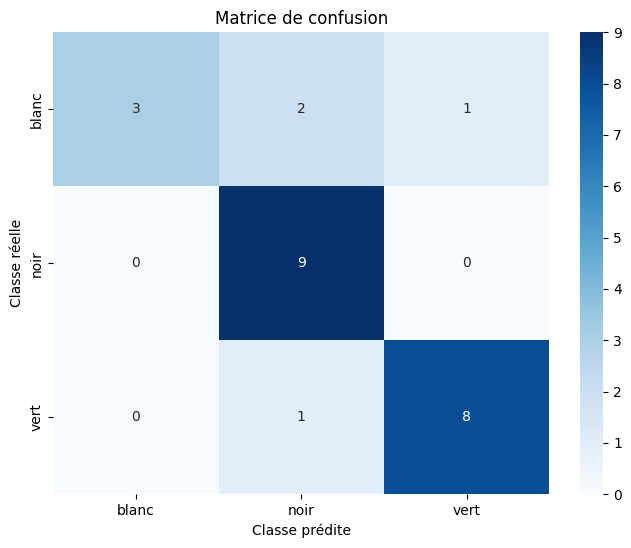

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_padded)

# Convertir les prédictions en classes prédites (indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Définir l'ordre des étiquettes à afficher
label_order = ['blanc', 'noir', 'vert']

# Afficher la matrice de confusion avec les étiquettes dans l'ordre spécifié
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


